# matplotlib

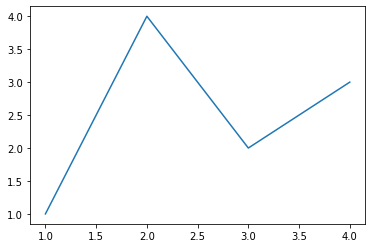

In [3]:
import matplotlib.pyplot as plt
import numpy as np
fig,ax=plt.subplots()
ax.plot([1,2,3,4],[1,4,2,3])
plt.show()

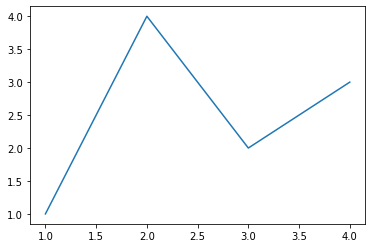

In [7]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3]) 

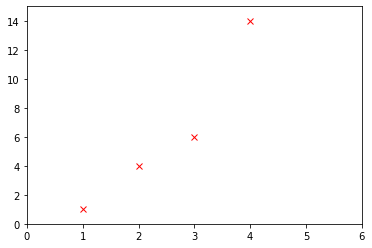

In [14]:
x=np.linspace(0,2,100)
plt.plot([1,2,3,4],[1,4,6,14],'rx')
plt.axis([0,6,0,15])#xy轴界限
plt.show()

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]


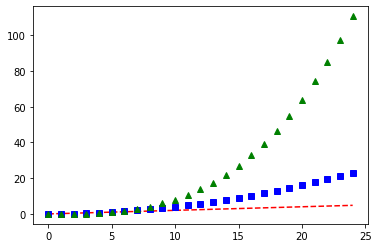

In [20]:
t = np.arange(0., 5., 0.2)
print(t)
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.plot(t,'r--', t**2, 'bs', t**3, 'g^')
plt.show()

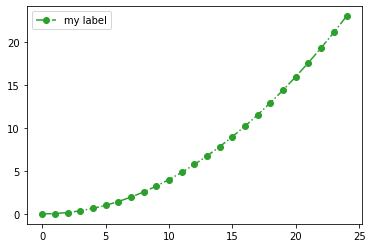

In [21]:
plt.plot(t**2, c='C2', ls='-.', marker='o', label='my label')
plt.legend()

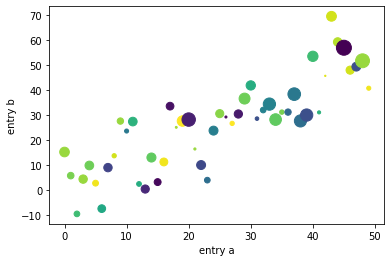

In [22]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100
plt.scatter('a', 'b', c='c', s='d', data=data)#c颜色s大小
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

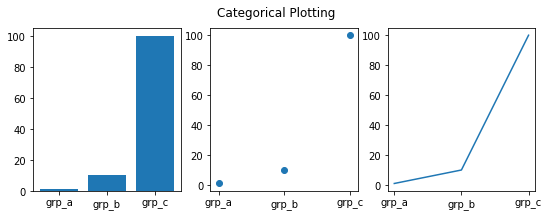

In [28]:
names=['grp_a','grp_b','grp_c']
values=[1,10,100]
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

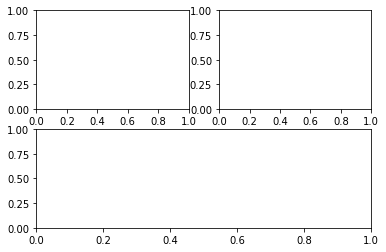

In [45]:
plt.figure()
plt.subplot(221)
plt.subplot(222)
plt.subplot(212)

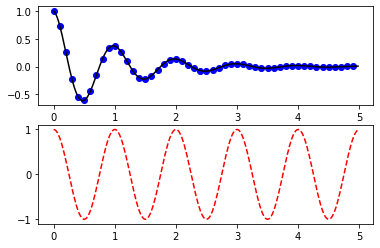

In [33]:
def f(t):
    return np.exp(-t)*np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
#print(t1,'\n',t2)
plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

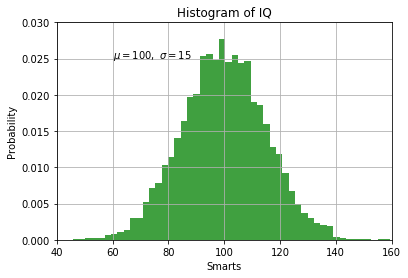

In [34]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

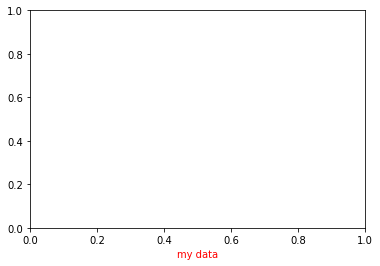

In [51]:
t = plt.xlabel('my data', fontsize=10, color='red')

Text(0.5, 1.0, '$\\sigma_i=15$')

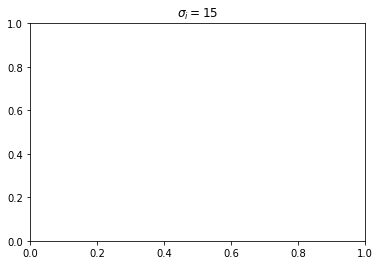

In [50]:
plt.title(r'$\sigma_i=15$')

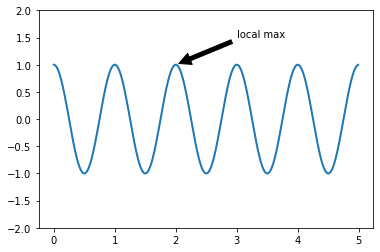

In [52]:
ax = plt.subplot(111)
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )#标注

plt.ylim(-2, 2)
plt.show()

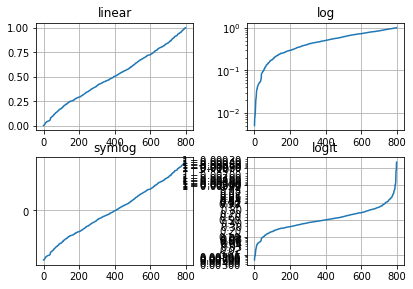

In [16]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

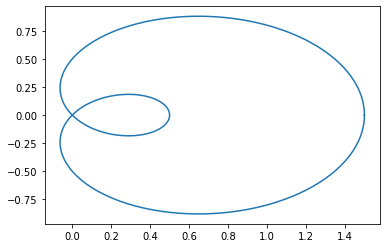

In [17]:
from scipy.interpolate import splprep, splev

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

N = 400
t = np.linspace(0, 2 * np.pi, N)
r = 0.5 + np.cos(t)
x, y = r * np.cos(t), r * np.sin(t)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

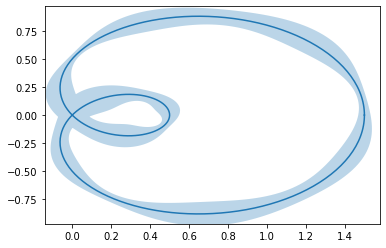

In [18]:
err = 0.05 * np.sin(2 * t) ** 2 + 0.04 + 0.02 * np.cos(9 * t + 2)

tck, u = splprep([x, y], s=0)
dx, dy = splev(u, tck, der=1)
l = np.hypot(dx, dy)
nx = dy / l
ny = -dx / l

xp = x + nx * err
yp = y + ny * err
xn = x - nx * err
yn = y - ny * err

vertices = np.block([[xp, xn[::-1]],
                     [yp, yn[::-1]]]).T
codes = Path.LINETO * np.ones(len(vertices), dtype=Path.code_type)
codes[0] = codes[len(xp)] = Path.MOVETO
path = Path(vertices, codes)

patch = PathPatch(path, facecolor='C0', edgecolor='none', alpha=0.3)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.add_patch(patch)
plt.show()

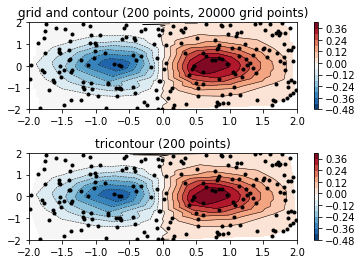

In [19]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

np.random.seed(19680801)
npts = 200
ngridx = 100
ngridy = 200
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)

fig, (ax1, ax2) = plt.subplots(nrows=2)

xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)

triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.set(xlim=(-2, 2), ylim=(-2, 2))
ax1.set_title('grid and contour (%d points, %d grid points)' %
              (npts, ngridx * ngridy))

ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=3)
ax2.set(xlim=(-2, 2), ylim=(-2, 2))
ax2.set_title('tricontour (%d points)' % npts)

plt.subplots_adjust(hspace=0.5)
plt.show()

# seaborn

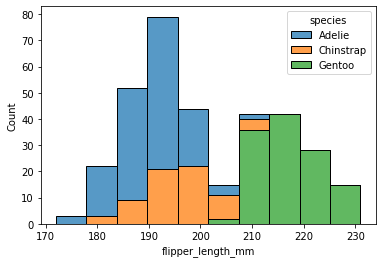

In [4]:
import seaborn as sns
import pandas as pd
#sns.set_theme(style="darkgrid")
penguins=pd.read_csv("penguins.csv")
tips=pd.read_csv("tips.csv")
fmri = pd.read_csv('fmri.csv')
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

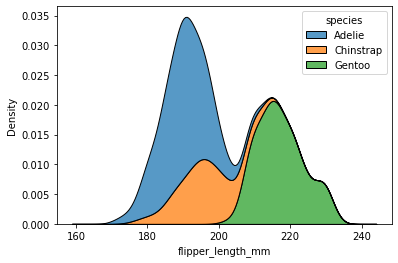

In [5]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

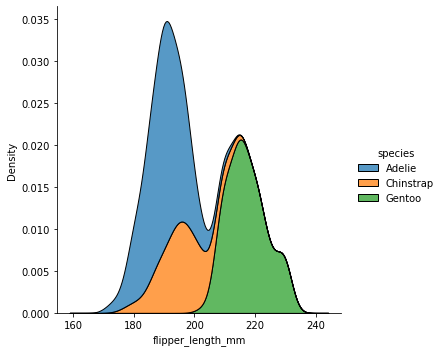

In [7]:
# kind="kde"
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

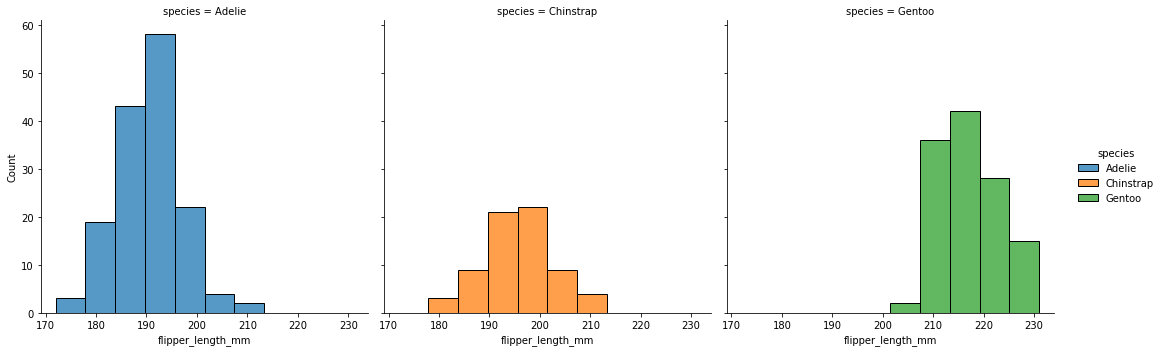

In [8]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

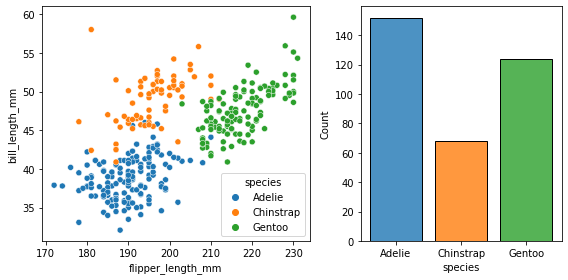

In [9]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

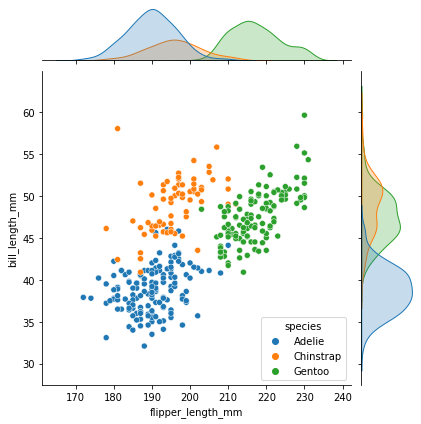

In [10]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

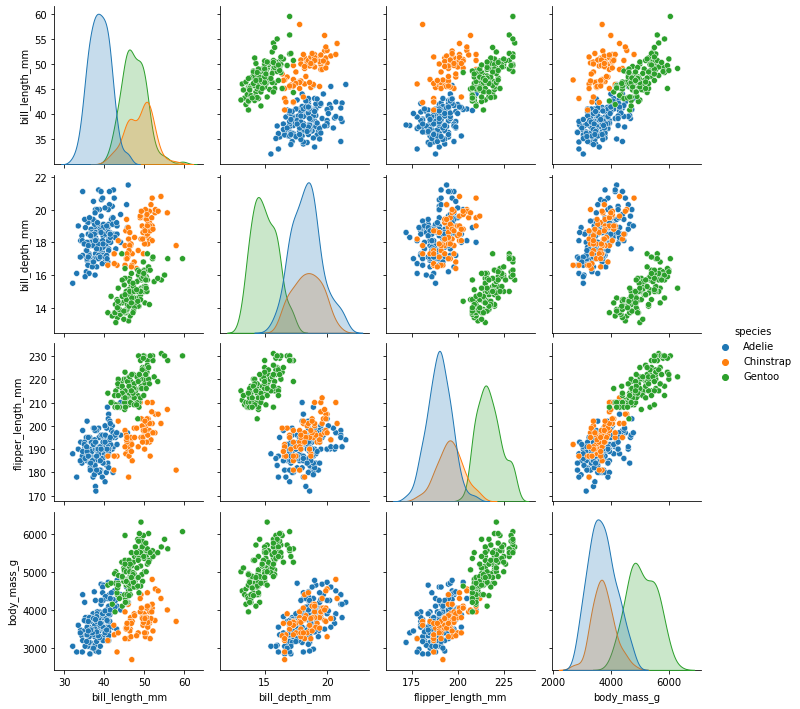

In [11]:
sns.pairplot(data=penguins, hue="species")

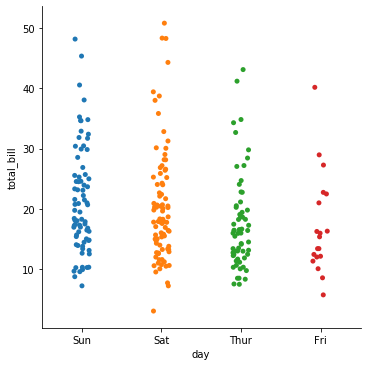

In [12]:
sns.catplot(x="day", y="total_bill", data=tips)

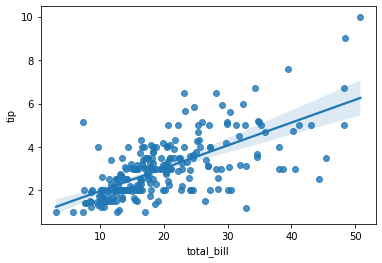

In [13]:
sns.regplot(x="total_bill", y="tip", data=tips);

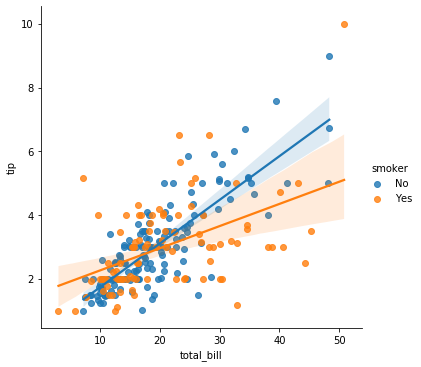

In [14]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

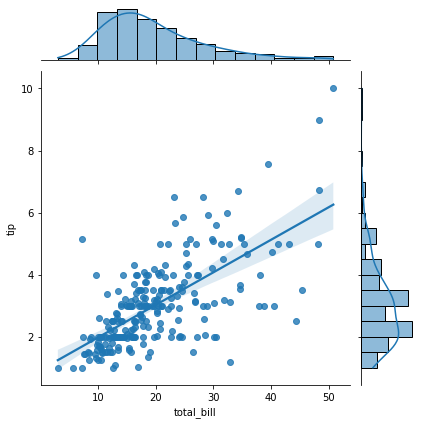

In [15]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

# pandas

In [4]:
import numpy as np
import pandas as pd
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
dates = pd.date_range('20130101', periods=6)
print(dates)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01 -0.351010  0.903860  0.703669 -0.857577
2013-01-02  0.730910  0.087986 -0.167555  1.288872
2013-01-03  1.402803 -0.998504  0.471734 -0.545667
2013-01-04  0.490081 -1.503508 -0.758696  0.136923
2013-01-05  2.243330  2.155016 -0.494419  0.127284
2013-01-06  1.086088  0.936537 -2.073202 -0.616362


In [7]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [8]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [14]:
grads = pd.read_excel('成绩.xlsx', index_col='id')
#grads
grads.head()#默认5行
#grads.tail(3)

,cell_01,code_cell_01,valid_cell_01,line_01,cell_02,code_cell_02,valid_cell_02,line_02,cell_03,code_cell_03,valid_cell_03,line_03,cell_04,code_cell_04,valid_cell_04,line_04
id,,,,,,,,,,,,,,,,
3120105068,7.0,7.0,6.0,225.0,19.0,19.0,18.0,298.0,14.0,14.0,14.0,201.0,14.0,14.0,14.0,203.0
3120301259,21.0,21.0,20.0,163.0,25.0,24.0,22.0,162.0,27.0,26.0,25.0,204.0,19.0,19.0,18.0,191.0
3120332023,37.0,37.0,35.0,164.0,28.0,28.0,27.0,376.0,94.0,94.0,93.0,521.0,NaN,NaN,NaN,NaN
3120132004,37.0,37.0,36.0,171.0,26.0,26.0,25.0,368.0,57.0,57.0,56.0,250.0,NaN,NaN,NaN,NaN
3120118053,104.0,104.0,101.0,203.0,22.0,22.0,20.0,264.0,67.0,67.0,65.0,345.0,35.0,34.0,32.0,340.0


In [20]:
grads.index#索引，数字
grads.columns#列名
grads.describe()#相当于箱图

,cell_01,code_cell_01,valid_cell_01,line_01,cell_02,code_cell_02,valid_cell_02,line_02,cell_03,code_cell_03,valid_cell_03,line_03,cell_04,code_cell_04,valid_cell_04,line_04
count,79.000000,79.000000,79.000000,79.000000,81.000000,81.000000,81.00000,81.000000,78.000000,78.000000,78.000000,78.000000,65.000000,65.000000,65.000000,65.000000
mean,72.000000,69.708861,62.974684,232.772152,43.691358,41.888889,36.37037,264.493827,63.333333,60.884615,57.500000,297.089744,41.969231,40.507692,37.446154,403.846154
std,59.942066,59.264975,51.976320,102.178696,40.684039,39.154182,34.30213,105.482478,47.886410,45.349431,42.751092,141.492066,40.233292,39.562894,37.189561,939.292623
min,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,29.000000,25.500000,22.000000,167.500000,22.000000,22.000000,20.00000,208.000000,24.750000,23.000000,22.000000,204.000000,17.000000,15.000000,14.000000,206.000000
50%,54.000000,53.000000,49.000000,222.000000,36.000000,33.000000,28.00000,264.000000,56.000000,55.500000,54.500000,274.000000,28.000000,27.000000,26.000000,230.000000
75%,96.000000,95.500000,89.500000,286.500000,45.000000,45.000000,41.00000,339.000000,93.750000,91.500000,89.000000,415.250000,53.000000,46.000000,45.000000,330.000000
max,280.000000,280.000000,197.000000,586.000000,201.000000,201.000000,194.00000,561.000000,200.000000,200.000000,181.000000,649.000000,209.000000,209.000000,192.000000,7683.000000


In [22]:
grads.sort_index()#按照索引排序
grads.sort_values(by='line_01')

,cell_01,code_cell_01,valid_cell_01,line_01,cell_02,code_cell_02,valid_cell_02,line_02,cell_03,code_cell_03,valid_cell_03,line_03,cell_04,code_cell_04,valid_cell_04,line_04
id,,,,,,,,,,,,,,,,
3120101097,1.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0
3120305694,18.0,18.0,7.0,42.0,8.0,8.0,3.0,46.0,7.0,7.0,4.0,325.0,6.0,6.0,0.0,0.0
3120301255,4.0,4.0,3.0,71.0,14.0,14.0,10.0,90.0,9.0,9.0,7.0,134.0,32.0,32.0,30.0,330.0
3120101221,22.0,21.0,11.0,76.0,22.0,22.0,21.0,106.0,3.0,3.0,1.0,66.0,NaN,NaN,NaN,NaN
3120305718,27.0,26.0,25.0,98.0,75.0,72.0,49.0,245.0,37.0,34.0,31.0,370.0,NaN,NaN,NaN,NaN
3120109017,37.0,30.0,19.0,112.0,12.0,10.0,3.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120305660,69.0,65.0,58.0,114.0,40.0,27.0,25.0,399.0,114.0,94.0,93.0,553.0,20.0,12.0,10.0,111.0
3120999178,41.0,41.0,40.0,118.0,64.0,64.0,61.0,191.0,123.0,123.0,121.0,470.0,NaN,NaN,NaN,NaN
3120303087,99.0,97.0,94.0,126.0,33.0,33.0,32.0,155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
grads[['line_01', 'line_02']]#对应列
grads[0:3]#三行数据

,cell_01,code_cell_01,valid_cell_01,line_01,cell_02,code_cell_02,valid_cell_02,line_02,cell_03,code_cell_03,valid_cell_03,line_03,cell_04,code_cell_04,valid_cell_04,line_04
id,,,,,,,,,,,,,,,,
3120105068,7.0,7.0,6.0,225.0,19.0,19.0,18.0,298.0,14.0,14.0,14.0,201.0,14.0,14.0,14.0,203.0
3120301259,21.0,21.0,20.0,163.0,25.0,24.0,22.0,162.0,27.0,26.0,25.0,204.0,19.0,19.0,18.0,191.0
3120332023,37.0,37.0,35.0,164.0,28.0,28.0,27.0,376.0,94.0,94.0,93.0,521.0,NaN,NaN,NaN,NaN


In [25]:
grads.loc[[3120332023, 3120301259], ['line_01', 'line_02']]

,line_01,line_02
id,,
3120332023,164.0,376.0
3120301259,163.0,162.0


In [27]:
grads.at[3120301259, 'line_01']
grads.loc[[3120301259], ['line_01']]

,line_01
id,
3120301259,163.0


In [28]:
grads.iloc[[1, 3], [2, 4]]#对应行列

,valid_cell_01,cell_02
id,,
3120301259,20.0,25.0
3120132004,36.0,26.0


In [29]:
grads.iat[1, 1]

21.0

In [31]:
grads[grads['line_01'] >= 200]
grads['line_01'] >= 200

id
3120105068     True
3120301259    False
3120332023    False
3120132004    False
3120118053     True
3120305718    False
3120132006    False
3120301183     True
3120303014     True
3120305664     True
3120301047     True
3120319111     True
3120101220    False
3120301223     True
3120332025     True
3120305660    False
3120103152     True
3120101059    False
3120305679     True
3120305601    False
3120332044     True
3120319056    False
3120101202    False
3120101127    False
3120101238     True
3120101019    False
3120101240     True
4120101106     True
3120101221    False
3120999178    False
              ...  
3120101212     True
3120118047     True
3120305694    False
3120101074     True
3120332011     True
3120101015    False
3120332035     True
3120101271     True
3120118038     True
3120319067    False
3120101097    False
3120305456     True
3120305454     True
3120101095     True
3120101215     True
3120305590     True
3120101151     True
3120118046     True
3120101211     Tr

In [37]:
grads[grads['line_01'] == np.nan]

,cell_01,code_cell_01,valid_cell_01,line_01,cell_02,code_cell_02,valid_cell_02,line_02,cell_03,code_cell_03,valid_cell_03,line_03,cell_04,code_cell_04,valid_cell_04,line_04
id,,,,,,,,,,,,,,,,


In [40]:
good = grads.dropna(how='any')#删除nan
good.shape

(63, 16)

In [45]:
grads['line_01'].fillna(value=1000)#替换nan
#grads.isna()

id
3120105068     225.0
3120301259     163.0
3120332023     164.0
3120132004     171.0
3120118053     203.0
3120305718      98.0
3120132006     166.0
3120301183     292.0
3120303014     281.0
3120305664     389.0
3120301047     307.0
3120319111     214.0
3120101220     169.0
3120301223     586.0
3120332025     307.0
3120305660     114.0
3120103152     363.0
3120101059     192.0
3120305679     278.0
3120305601     188.0
3120332044     222.0
3120319056     166.0
3120101202     153.0
3120101127     191.0
3120101238     514.0
3120101019     162.0
3120101240     257.0
4120101106     277.0
3120101221      76.0
3120999178     118.0
               ...  
3120101212     231.0
3120118047     353.0
3120305694      42.0
3120101074     206.0
3120332011     202.0
3120101015     131.0
3120332035     230.0
3120101271     229.0
3120118038     236.0
3120319067     174.0
3120101097       0.0
3120305456     357.0
3120305454     253.0
3120101095     237.0
3120101215     203.0
3120305590     298.0
3120101151

In [44]:
grads.mean()#每一列的均值

grads.mean(1)#每一行的均值

id
3120105068     67.937500
3120301259     61.687500
3120332023    127.833333
3120132004     95.500000
3120118053    114.062500
3120305718     90.750000
3120132006    125.000000
3120301183     94.875000
3120303014    113.625000
3120305664    197.583333
3120301047    144.312500
3120319111    205.562500
3120101220    146.812500
3120301223    195.750000
3120332025    166.812500
3120305660    112.750000
3120103152    205.750000
3120101059     71.187500
3120305679    115.375000
3120305601     54.125000
3120332044    132.312500
3120319056    157.583333
3120101202     93.437500
3120101127     72.125000
3120101238     96.062500
3120101019     81.312500
3120101240     67.625000
4120101106    119.125000
3120101221     31.166667
3120999178    121.416667
                 ...    
3120101212    110.875000
3120118047    233.187500
3120305694     31.562500
3120101074     84.312500
3120332011    104.562500
3120101015     58.062500
3120332035     99.812500
3120101271    113.937500
3120118038    129.3750

In [46]:
grads['total'] = grads[['line_01', 'line_02', 'line_03', 'line_04']].apply(np.sum, axis=1)
grads['total']

id
3120105068     927.0
3120301259     720.0
3120332023    1061.0
3120132004     789.0
3120118053    1152.0
3120305718     713.0
3120132006     976.0
3120301183    1062.0
3120303014     872.0
3120305664    1404.0
3120301047    1686.0
3120319111    1013.0
3120101220     606.0
3120301223    1541.0
3120332025    1403.0
3120305660    1177.0
3120103152    2123.0
3120101059     798.0
3120305679    1238.0
3120305601     626.0
3120332044    1399.0
3120319056     867.0
3120101202     885.0
3120101127     794.0
3120101238    1286.0
3120101019     968.0
3120101240     960.0
4120101106    1063.0
3120101221     248.0
3120999178     779.0
               ...  
3120101212    1062.0
3120118047    1770.0
3120305694     413.0
3120101074     997.0
3120332011    1181.0
3120101015     861.0
3120332035    1053.0
3120101271    1158.0
3120118038    1345.0
3120319067     796.0
3120101097       0.0
3120305456    1184.0
3120305454     662.0
3120101095     891.0
3120101215     595.0
3120305590    1009.0
3120101151

In [47]:
grads.groupby('cell_01').sum()

,code_cell_01,valid_cell_01,line_01,cell_02,code_cell_02,valid_cell_02,line_02,cell_03,code_cell_03,valid_cell_03,line_03,cell_04,code_cell_04,valid_cell_04,line_04,total
cell_01,,,,,,,,,,,,,,,,
1.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0
4.0,8.0,6.0,307.0,59.0,45.0,39.0,446.0,61.0,58.0,53.0,350.0,59.0,59.0,56.0,882.0,1985.0
7.0,14.0,12.0,356.0,24.0,24.0,22.0,520.0,22.0,22.0,21.0,479.0,18.0,18.0,17.0,433.0,1788.0
10.0,10.0,9.0,201.0,3.0,3.0,2.0,268.0,4.0,4.0,3.0,204.0,3.0,3.0,2.0,219.0,892.0
11.0,11.0,9.0,257.0,19.0,19.0,18.0,253.0,8.0,8.0,7.0,202.0,4.0,4.0,4.0,248.0,960.0
12.0,12.0,9.0,139.0,4.0,4.0,3.0,181.0,2.0,2.0,1.0,198.0,3.0,3.0,2.0,7683.0,8201.0
15.0,15.0,14.0,231.0,26.0,25.0,23.0,250.0,89.0,88.0,76.0,459.0,19.0,15.0,14.0,282.0,1222.0
18.0,18.0,7.0,42.0,8.0,8.0,3.0,46.0,7.0,7.0,4.0,325.0,6.0,6.0,0.0,0.0,413.0
21.0,21.0,20.0,163.0,25.0,24.0,22.0,162.0,27.0,26.0,25.0,204.0,19.0,19.0,18.0,191.0,720.0


In [ ]:
grads.groupby('cell_01').sum()

In [ ]:
def id_to_school(id):
    id=str(id)
    if id.startWith('312030'):
        return '电信学院'
    elif startWith(''):
        return ''
#学院对应的学号范围未知？？？？

In [ ]:
grads['学院']=grades.apply(lambda x:id_to_school(x['id']))
total_results=grads.groupby('学院').sum()